<a href="https://colab.research.google.com/github/ChrisDaVillager/Data-Science-Salaries/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Christopher Puccetti**

# **Mount & Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sklearn.metrics as metrics
from sklearn import set_config
set_config(display='diagram')

# **Dataset 1: Videogame Sales**

1. Source of data
  * https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset 
2. Brief description of data
  * Dataset that includes video games alongside their respective publisher/developer and how well they sold. 
3. What is the target?
  * Target it 'Global_Sales'
4. Is this a classification or regression problem?
  * Regression
5. How many features?
  * 16 total features
6. How many rows of data.
  * 16719 rows
7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
  * Missing values that could skew model predictions and visualization, having to drop columns that have more than half of missing values

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Stack 2/Video_Games_Sales_as_at_22_Dec_2016.csv')
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


# **Dataset 2: Data Science Job Salaries**

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Stack 2/ds_salaries.csv')
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


1. Source of data
  * https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
2. Brief description of data
  * Salaries of Data Science careers based on exp level, location and title
3. What is the target?
  * Target is 'salary'
4. Is this a classification or regression problem?
  * Regression
5. How many features?
  * 12 total features
6. How many rows of data.
  * 607 rows
7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
  * Small dataset & binarizing values

In [ ]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


#**Project 2 - Part 2**

**To meet the requirements for this week you must have:**

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-clearly commented all of your cleaning steps and described any decisions you made



In [ ]:
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Dropping unnecessary columns**

In [ ]:
# removing unnecessary columns
# removing 'salary', 'salary_currency' and 'Unnamed: 0' & 'company_location' as we will focus on salary in USD
df2 = df2.drop(columns=['Unnamed: 0', 'salary', 'salary_currency', 'company_location'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_size        607 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.1+ KB


**Checking duplicate values**

In [ ]:
df2.duplicated().sum()

42

**Checking missing values**

In [ ]:
df2.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_size          0
dtype: int64

In [196]:
df2.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

**Checking inconsistencies in data for categorical values**
* No inconsistencies found in data

In [ ]:
df2['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

**Produce univariate visuals for the target and all features**

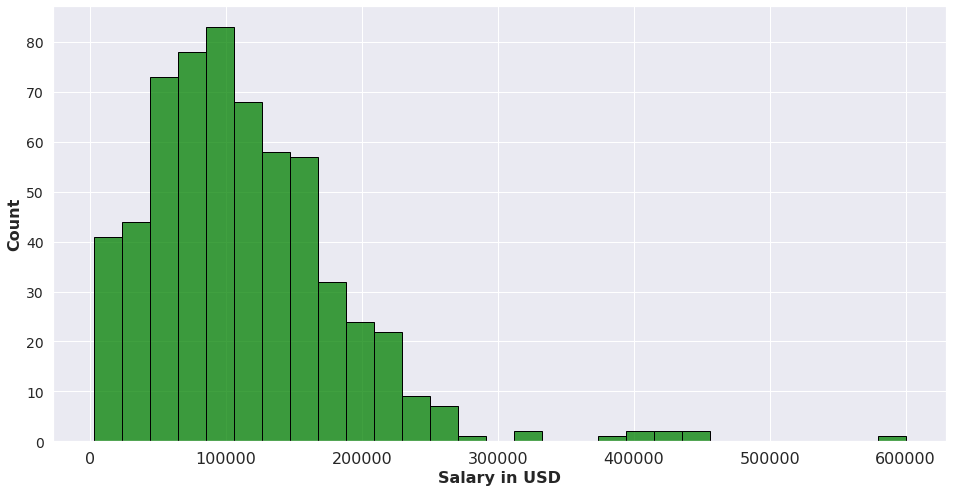

In [ ]:
# creating histogram of salaries

sns.set(style = 'darkgrid')
plt.figure(figsize=(16,8))

sns.histplot(data=df2, x='salary_in_usd', color='green', edgecolor='black')
plt.xlabel('Salary in USD', size=16, weight='semibold')
plt.xticks(size=16)
plt.ylabel('Count', size=16, weight='semibold')
plt.yticks(size=14)

plt.show();

The above histogram displays the Salaries of Data Science careers in USD. As displayed, most careers average around 100k. There are a few outliers like 400k & 600k. The higher the salary, the more important that role could be.

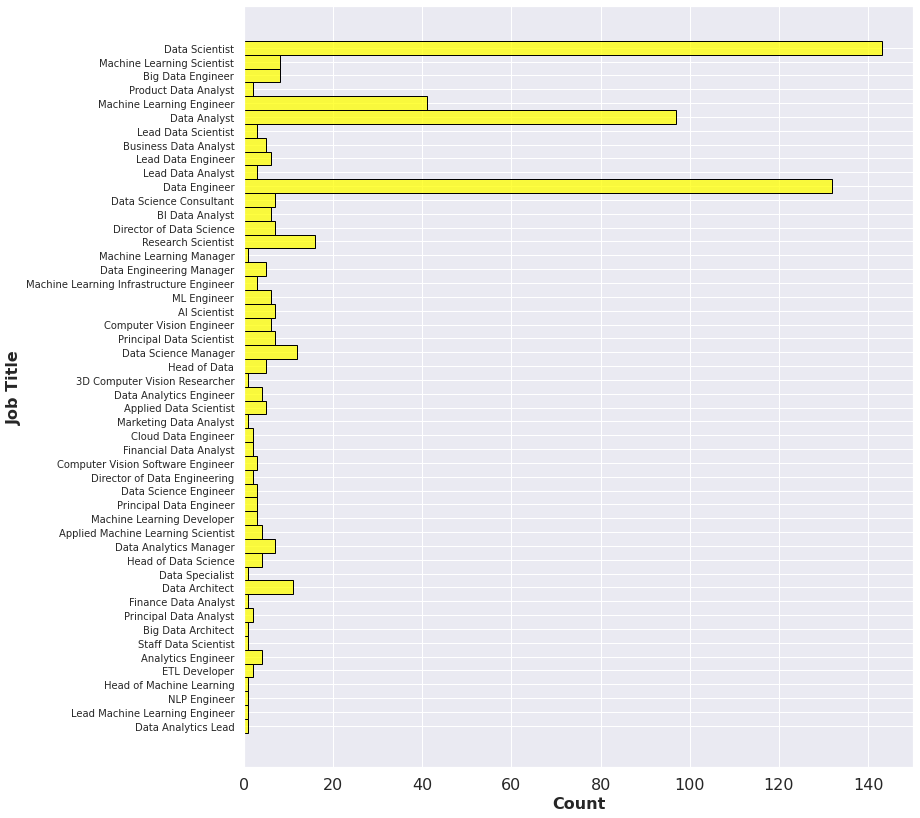

In [ ]:
# creating secondary histogram to display job titles 

sns.set(style = 'darkgrid')
plt.figure(figsize=(12,14))

sns.histplot(data=df2, y='job_title', color='yellow', edgecolor='black')
plt.xlabel('Count', size=16, weight='semibold')
plt.xticks(size=16)
plt.ylabel('Job Title', size=16, weight='semibold')
plt.yticks(size=10)

plt.show();

Our histogram above is displaying the amount of roles, alongside the amount of employees that sit in the role, in our dataset. We can see a majority of our employees from our dataset sits in the Data Scientist/Engineer role.

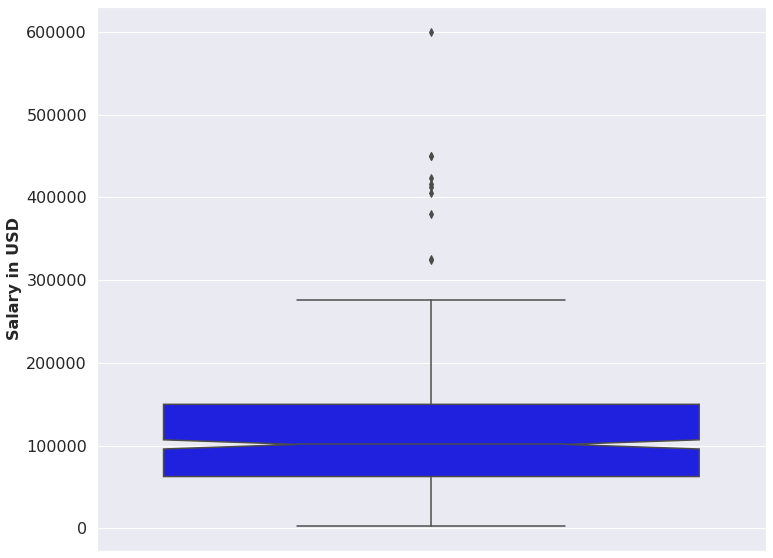

In [ ]:
# creating boxplot of salaries

sns.set(style='darkgrid')
plt.figure(figsize = (12,10))

sns.boxplot(data=df2, y='salary_in_usd', notch= True, color='Blue')
plt.ylabel('Salary in USD', size=16, weight='semibold')
plt.yticks(size=16)

plt.show();

The boxplot displays the average salary range for the employees in our dataset. Majority of the provided data is in the range of 80k to 150k. The median salary sits just above 100k. Outliers are easily displayed, in compared to our histogram. 

#**Project 2 - Part 3**

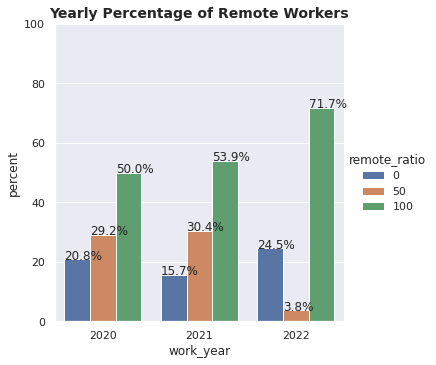

In [ ]:
# creating countplot defining x='work_year' and hue='remote_ratio'
# CITING: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
# CITING cont: using percentages on top of barplots

sns.set_theme(style='darkgrid')

x,y = 'work_year','remote_ratio'

df3 = df2.groupby(x)[y].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('percent').reset_index()

z = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df3)
z.ax.set_ylim(0,100)

for g in z.ax.patches:
    text = str(g.get_height().round(1)) + '%'
    text_x = g.get_x()
    text_y = g.get_height()
    z.ax.text(text_x, text_y, text)

plt.title('Yearly Percentage of Remote Workers', weight='bold', size=14)
plt.show();

The above countplot displays the amount of employees that either worked in office, hybrid or remote throughout 2020 to 2022. We can see that remote work increased from '20 to '21 and a huge jump from '21 to '22. Office work did increase over the 2 years and hybrid decreased. Employee's had to have made a decision of which type of work they would rather do. 

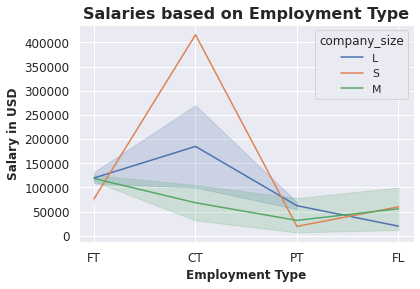

In [ ]:
# creating lineplot to display how much employee's make based on their employment type and the size of the company they work for
sns.set_theme(style='darkgrid')
sns.lineplot(data=df2, x='employment_type', y='salary_in_usd', hue='company_size')

plt.title('Salaries based on Employment Type', weight='bold', size=16)
plt.xlabel('Employment Type', weight='semibold')
plt.xticks(size=12)
plt.ylabel('Salary in USD', weight='semibold')
plt.yticks(size=12)

plt.show();

Our lineplot shows the salaries of employee's based on their employment type. Small companies has a very big outlier when it comes to their CT type(contract work). This specific employee must have had a really good contract with a known consumer to land that salary. Both Large and Small companies pay their contract workers more, yet Medium sized companies pay all their non-FullTime employee's less on average. Free lance employee's dont get much of a salary, as do Part Time employees. 

In [200]:
# calulate mean of salaries based on job title using median
# CITING: https://stackoverflow.com/questions/53771596/how-to-find-average-salary-for-each-job-role-from-a-file-in-python
# CITING: https://betterprogramming.pub/visualize-charts-using-groupby-and-aggregate-python-functions-56454820a25c
# using groupby to gather information salary of job titles per year
# pivoting dataframe for better visualization
job_salary = df2.groupby(['job_title', 'work_year']).agg({'salary_in_usd':'median'})
job_salary = job_salary.pivot_table(index='work_year', columns='job_title', values='salary_in_usd')
job_salary

job_title,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,BI Data Analyst,Big Data Architect,Big Data Engineer,Business Data Analyst,Cloud Data Engineer,...,Machine Learning Manager,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist
work_year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,45896.0,NaN,NaN,NaN,98000.0,NaN,109024.0,117500.0,NaN,...,117104.0,260000.0,NaN,NaN,NaN,NaN,148261.0,13036.0,246000.0,NaN
2021,5409.0,15026.5,NaN,82137.5,230700.0,55000.0,99703.0,18000.0,59102.0,124647.0,...,NaN,172500.0,88654.0,NaN,170000.0,200000.0,220000.0,NaN,66904.5,105000.0
2022,NaN,160000.0,179850.0,177000.0,53437.5,NaN,NaN,NaN,44677.0,NaN,...,NaN,153000.0,NaN,37236.0,75000.0,NaN,162674.0,NaN,106713.5,NaN


In [194]:
job_salary.describe()

job_title,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,BI Data Analyst,Big Data Architect,Big Data Engineer,Business Data Analyst,Cloud Data Engineer,...,Machine Learning Manager,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist
count,1.0,3.000000,1.0,2.00000,2.0000,2.000000,1.0,2.000000,3.000000,1.0,...,1.0,3.000000,1.0,1.0,2.000000,1.0,3.000000,1.0,3.000000,1.0
mean,5409.0,73640.833333,179850.0,129568.75000,142068.7500,76500.000000,99703.0,63512.000000,73759.666667,124647.0,...,117104.0,195166.666667,88654.0,37236.0,122500.000000,200000.0,176978.333333,13036.0,139872.666667,105000.0
std,NaN,76365.311222,NaN,67077.91703,125343.5158,30405.591591,NaN,64363.687651,38560.766672,NaN,...,NaN,56987.571744,NaN,NaN,67175.144213,NaN,37948.405689,NaN,94039.604851,NaN
min,5409.0,15026.500000,179850.0,82137.50000,53437.5000,55000.000000,99703.0,18000.000000,44677.000000,124647.0,...,117104.0,153000.000000,88654.0,37236.0,75000.000000,200000.0,148261.000000,13036.0,66904.500000,105000.0
25%,5409.0,30461.250000,179850.0,105853.12500,97753.1250,65750.000000,99703.0,40756.000000,51889.500000,124647.0,...,117104.0,162750.000000,88654.0,37236.0,98750.000000,200000.0,155467.500000,13036.0,86809.000000,105000.0
50%,5409.0,45896.000000,179850.0,129568.75000,142068.7500,76500.000000,99703.0,63512.000000,59102.000000,124647.0,...,117104.0,172500.000000,88654.0,37236.0,122500.000000,200000.0,162674.000000,13036.0,106713.500000,105000.0
75%,5409.0,102948.000000,179850.0,153284.37500,186384.3750,87250.000000,99703.0,86268.000000,88301.000000,124647.0,...,117104.0,216250.000000,88654.0,37236.0,146250.000000,200000.0,191337.000000,13036.0,176356.750000,105000.0
max,5409.0,160000.000000,179850.0,177000.00000,230700.0000,98000.000000,99703.0,109024.000000,117500.000000,124647.0,...,117104.0,260000.000000,88654.0,37236.0,170000.000000,200000.0,220000.000000,13036.0,246000.000000,105000.0


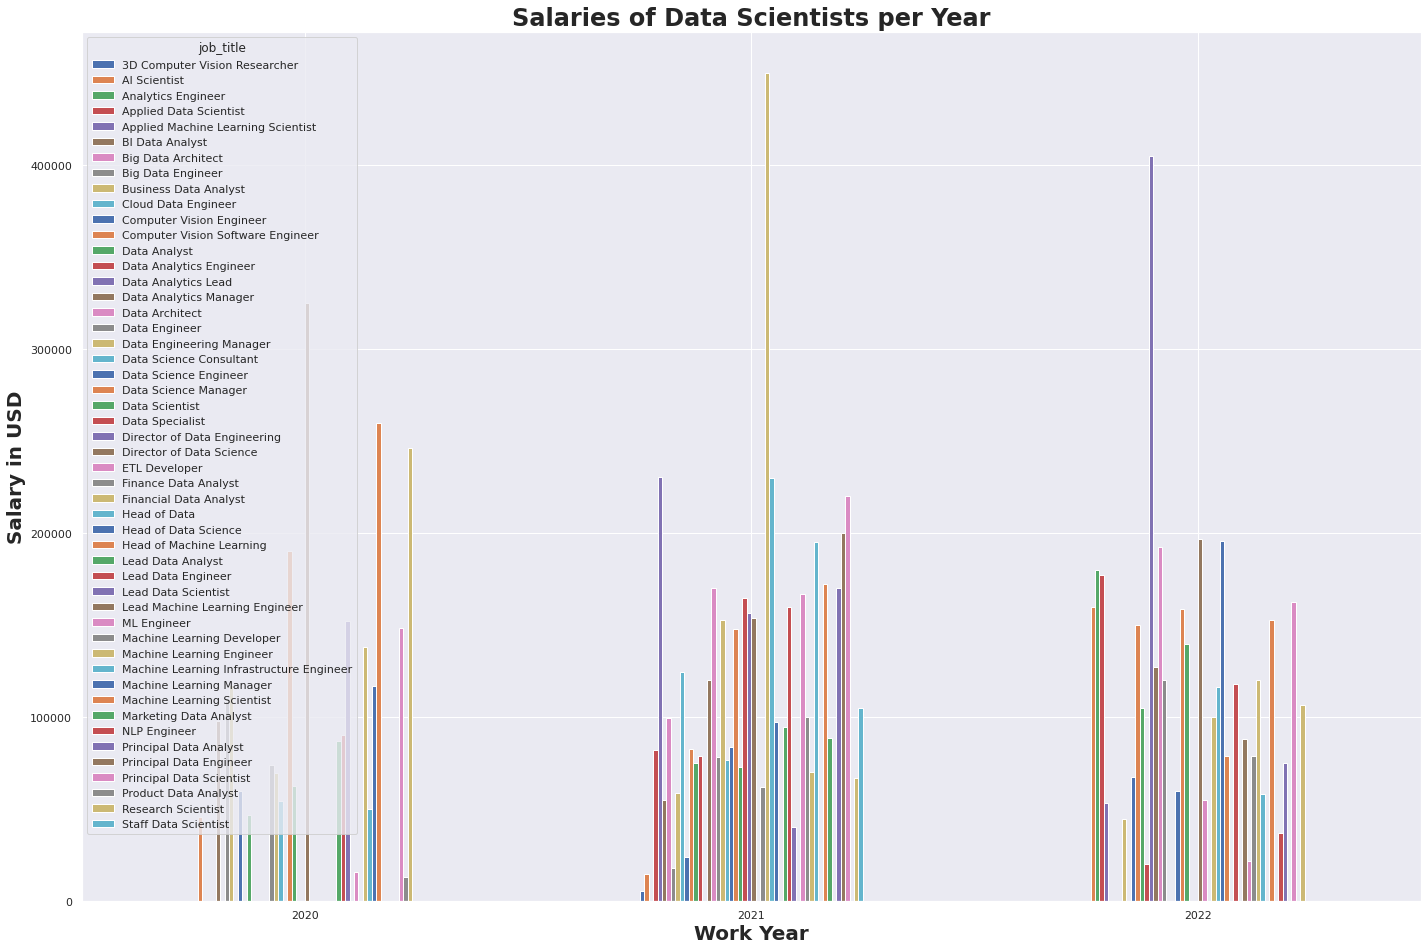

In [193]:
# creating barplot to display salaries based on job title 

sns.set(style = 'darkgrid')

job_salary.plot.bar(figsize=(24,16))
plt.title('Salaries of Data Scientists per Year', weight='bold', size=24)
plt.xlabel('Work Year', weight='semibold', size=20)
plt.xticks(rotation=0)
plt.ylabel('Salary in USD', weight='semibold', size=20)
plt.show();

#**Project 2- Part 4**

**Preprocessing Data**

In [ ]:
# create copy of df for ML
df_ml = df2.copy()
df_ml.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,L


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_size        607 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.1+ KB


In [ ]:
df_ml['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [ ]:
# ordinal encoding exp_level, emp_type & comp_size
exp_replace = {'SE':0, 'MI':1, 'EN':2, 'EX':26}
emp_replace = {'FT':0, 'PT':1, 'CT':2, 'FL':3}
comp_replace = {'L':0, 'M':1, 'S':2}

df_ml['experience_level'].replace(exp_replace, inplace=True)
df_ml['employment_type'].replace(emp_replace, inplace=True)
df_ml['company_size'].replace(comp_replace, inplace=True)
df_ml['company_size']

0      0
1      2
2      1
3      2
4      0
      ..
602    1
603    1
604    1
605    1
606    0
Name: company_size, Length: 607, dtype: int64

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    int64 
 2   employment_type     607 non-null    int64 
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_size        607 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 38.1+ KB


In [ ]:
# defining features & target
X = df_ml.drop('salary_in_usd', axis=1)
y = df_ml['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# instantiating selectors & transformers 
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# instantiate pipelines & transformers
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f396ac78a90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f396ac781d0>)])

In [ ]:
# transform training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[ 0.82597664, -0.34260816, -0.1611992 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82597664, -0.34260816, -0.1611992 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82597664, -0.34260816, -0.1611992 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.60844844,  0.03032656, -0.1611992 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82597664, -0.1561408 , -0.1611992 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.60844844, -0.1561408 , -0.1611992 , ...,  0.        ,
         0.        ,  0.        ]])

#**Using Random Forest Model**

In [ ]:
# instantiate RF
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# predict model
rf.predict(X_test_processed)

array([141300.0027831 , 141300.0027831 , 142674.39285714, 146679.6031746 ,
        55496.23516667, 135728.45      ,  40413.11      ,  39148.53      ,
        68341.15263095,  32384.08      ,  42807.56      , 141300.0027831 ,
       141300.0027831 ,  58650.8       , 146943.2       , 141300.0027831 ,
        68306.11      , 135512.5974026 ,  22521.42      , 137746.78362319,
        96072.84095238, 147803.035     , 141300.0027831 , 134597.79365079,
        61530.61      ,  60155.46      , 127088.08464286, 109042.60444444,
       114052.42953633,  86114.29902164,  64203.779     , 114052.42953633,
        95685.59      ,  36358.20780556,  59684.72      , 114052.42953633,
       140960.16666667,  88270.87761905,  49059.49333333, 108930.13781746,
       169670.82219698, 169670.82219698,  89767.5       ,  79972.70333333,
       114052.42953633,  54069.17      ,  55355.11016667, 135512.5974026 ,
       105573.5831746 , 161456.46026087, 114052.42953633,  40077.075     ,
        79474.25595238, 1

In [ ]:
# evaluate model
# high train score, low test score
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(f'Training Score: {rf_train_score}')
print(f'Testing Score: {rf_test_score}')

Training Score: 0.8315891318687694
Testing Score: 0.4532943483802597


In [ ]:
# set max_depth to 6 for another evaluation
rf_6 = RandomForestRegressor(max_depth=6, random_state=42)
rf_6.fit(X_train_processed, y_train)
rf_6_train_score = rf_6.score(X_train_processed, y_train)
rf_6_test_score = rf_6.score(X_test_processed, y_test)
print(f'Training Score: {rf_6_train_score}')
print(f'Testing Score: {rf_6_test_score}')

Training Score: 0.7087931884320031
Testing Score: 0.4717159748160673


**Tuning using GridSearchCV**

In [ ]:
# instantiating model and setting grid parameters
model = RandomForestRegressor()
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [1, 10, 20],
              'min_samples_split': [2, 10, 100]}

In [ ]:
# fit grid search onto training data
rf_grid_search = GridSearchCV(model, param_grid)
rf_grid_search.fit(X_train_processed, y_train)
rf_grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [ ]:
# evaluate best model by grabbing best R2 score
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X_train_processed, y_train)
best_rf_model.score(X_test_processed, y_test)

0.4856775699849527

**Tuning RF Model max_depth**

In [ ]:
# find max depth
est_depth = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depth)

39

In [ ]:
# creating df display scores
depths = range(1, max(est_depth))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train_processed, y_train)
    scores.loc[depth, 'Train Score'] = model.score(X_train_processed, y_train)
    scores.loc[depth, 'Test Score'] = model.score(X_test_processed, y_test)

scores.head()

,Test Score,Train Score
1,0.396983,0.307711
2,0.405327,0.431253
3,0.440052,0.533881
4,0.445635,0.611563
5,0.467256,0.666764


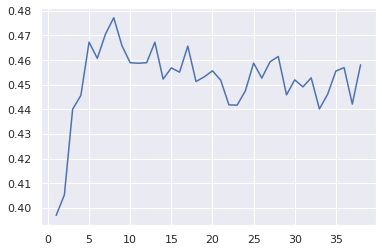

In [ ]:
# plot scores
plt.plot(scores['Test Score']);

In [ ]:
# sorting scores by best test scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
8,0.477158,0.763344
7,0.470565,0.742594
5,0.467256,0.666764
13,0.467243,0.816018
9,0.465803,0.779602


In [ ]:
# evaluating using best max_depth
rf_7 = RandomForestRegressor(max_depth=7, random_state=42)
rf_7.fit(X_train_processed, y_train)
rf_7_train_score = rf_7.score(X_train_processed, y_train)
rf_7_test_score = rf_7.score(X_test_processed, y_test)
print(f'Training Score: {rf_7_train_score}')
print(f'Testing Score: {rf_7_test_score}')

Training Score: 0.7434580992241269
Testing Score: 0.47484582908373185


**Tuning RF Model n_estimators**

In [ ]:
# creating list of values for n_estimators
# using max_depth of 7
n_est = [10, 100, 150, 200, 250, 300]
scores2 = pd.DataFrame(index=n_est, columns=['Test Score', 'Train Score'])
for n in n_est:
    model = RandomForestRegressor(max_depth=7, n_estimators=n)
    model.fit(X_train_processed, y_train)
    scores2.loc[n, 'Train Score'] = model.score(X_train_processed, y_train)
    scores2.loc[n, 'Test Score'] = model.score(X_test_processed, y_test)

scores2.head()

,Test Score,Train Score
10,0.443679,0.717924
100,0.464474,0.741713
150,0.466872,0.743915
200,0.469938,0.742067
250,0.468562,0.741475


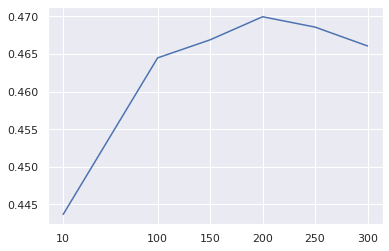

In [ ]:
# plot scores
plt.plot(scores2['Test Score'])
plt.xticks(n_est);

In [ ]:
# sort scores by best test scores
scores2_sorted = scores2.sort_values(by='Test Score', ascending=False)
scores2_sorted.head()

,Test Score,Train Score
200,0.469938,0.742067
250,0.468562,0.741475
150,0.466872,0.743915
300,0.466057,0.746512
100,0.464474,0.741713


#**Using KNN Model**

In [ ]:
# creating evaluation model function for MAE, RMSE & R2 Score
def eval_model(y_true, y_pred):
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [ ]:
# instantiate scaler & pca > pipeline
# will use 90% variance
# transform data to check features after PCA app.
scaler = StandardScaler()
pca = PCA(n_components=.90)
preprocessor_pca = make_pipeline(scaler, pca)

print('Shape prior PCA:', X_train_processed.shape)
print('Shape after PCA:', preprocessor_pca.fit_transform(X_train_processed).shape)
print('Columns Reduced by:', X_train_processed.shape[1] - preprocessor_pca.fit_transform(X_train_processed).shape[1])

Shape prior PCA: (455, 98)
Shape after PCA: (455, 74)
Columns Reduced by: 24


In [ ]:
# instantiate KNN
knn = KNeighborsRegressor()

**With PCA**

* We'll plot first 74 components in order to clearly see diminishing returns
* Diminishing returns tend to occur around 62 components

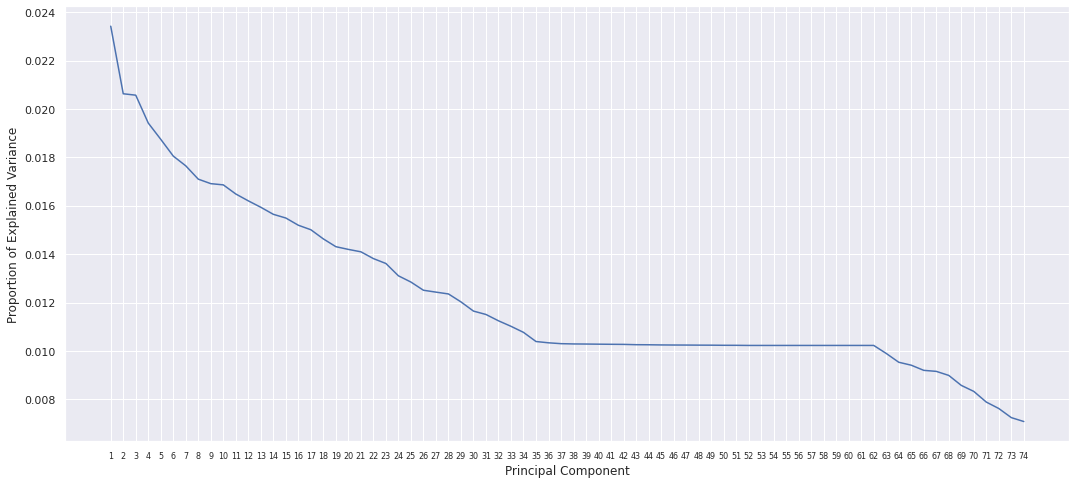

In [ ]:
# Plot the explained variance ratios of the first 74 principal components
plt.figure(figsize=(18,8))
plt.plot(range(1, 75), pca.explained_variance_ratio_)
plt.xticks(ticks = range(1, 75), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

In [ ]:
%%time
# using PCA 
pca62 = PCA(n_components=62)
knn_pca = make_pipeline(scaler, pca62, knn)
knn_pca.fit(X_train_processed, y_train)

print('Training Data')
eval_model(y_train, knn_pca.predict(X_train_processed))
print('\nTesting Data')
eval_model(y_test, knn_pca.predict(X_test_processed))

Training Data
scores: 
MAE: 34,048.95 
MSE: 2,377,792,666.34 
RMSE: 48,762.62 
R2: 0.54

Testing Data
scores: 
MAE: 42,672.54 
MSE: 4,265,303,699.40 
RMSE: 65,309.29 
R2: 0.03
CPU times: user 34.2 ms, sys: 16.6 ms, total: 50.8 ms
Wall time: 32.9 ms


**Without PCA**

In [ ]:
%%time
# no PCA
no_pca = make_pipeline(scaler, knn)
no_pca.fit(X_train_processed, y_train)

print('Training Data')
eval_model(y_train, no_pca.predict(X_train_processed))
print('\nTesting Data')
eval_model(y_test, no_pca.predict(X_test_processed))

Training Data
scores: 
MAE: 33,893.11 
MSE: 2,353,995,209.94 
RMSE: 48,517.99 
R2: 0.55

Testing Data
scores: 
MAE: 39,002.79 
MSE: 3,768,589,005.98 
RMSE: 61,388.83 
R2: 0.15
CPU times: user 20.1 ms, sys: 15.3 ms, total: 35.4 ms
Wall time: 24.8 ms


**Tuning using GridSearchCV**

In [ ]:
# instantiate model pipeline
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
knn_pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsregressor', KNeighborsRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsregressor': KNeighborsRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsregressor__algorithm': 'auto',
 'kneighborsregressor__leaf_size': 30,
 'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__metric_params': None,
 'kneighborsregressor__n_jobs': None,
 'kneighborsregressor__n_neighbors': 5,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'uniform'}

In [ ]:
# set grid parameters, instantiate pipelines & evaluate best model
knn_grid = {'kneighborsregressor__n_neighbors': range(1,10),
            'kneighborsregressor__p': range(1,5),
            'kneighborsregressor__weights': ['distance','uniform']}

knn_pipeline_gs = GridSearchCV(knn_pipeline, knn_grid)
knn_pipeline_gs.fit(X_train_processed, y_train)
print(knn_pipeline_gs.best_params_)

best_knn_model = knn_pipeline_gs.best_estimator_
best_knn_model.score(X_test_processed, y_test).round(2)

{'kneighborsregressor__n_neighbors': 4, 'kneighborsregressor__p': 4, 'kneighborsregressor__weights': 'uniform'}


0.08